<a href="https://colab.research.google.com/github/Duyenmaico/doan_bankmarketing/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1 phan tich giá trị của tất cả thuộc tính ý nghĩa
2 tỉ lệ y (yes no)
3 những khách hàng yes no ( thường có đặc điểm gì)*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full.csv', header=0, na_values='NA', comment='\t', sep=';', skipinitialspace=True)
# hiển thị thông tin cơ bản về dữ liệu trong DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
# Hiển thị giá trị chi tiết của các thuộc tính cụ thể
print(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']])


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
# Tính tỷ lệ của biến y
y_counts = df['y'].value_counts()
total_samples = len(df)
y_percentage = (y_counts / total_samples) * 100

# In kết quả
print(y_percentage)

no     88.30152
yes    11.69848
Name: y, dtype: float64


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.shape

(45211, 17)

Tiền xử lý dữ liệu

In [ ]:
# loại bỏ khoảng trắng
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = df[i].str.strip()

In [ ]:
df.shape

(45211, 17)

In [ ]:
# Kiểm tra dữ liệu NaN trong DataFrame
nan_check = df.isna()

In [ ]:
# In ra kết quả kiểm tra
print(nan_check)

         age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome

In [ ]:
#Kiem tra gia tri trùng lặp
print("Dữ liệu trùng lặp:", df.duplicated().sum())

Dữ liệu trùng lặp: 0


In [ ]:
# đếm số lượng giá trị thiếu(missing values) trong mỗi cột của DataFrame
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

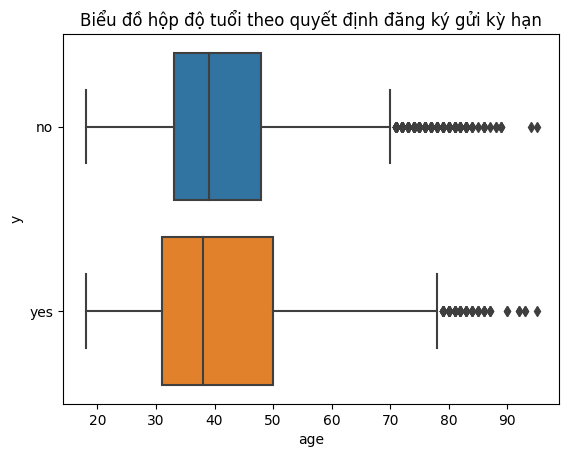

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='age', y='y', data=df)
plt.title("Biểu đồ hộp độ tuổi theo quyết định đăng ký gửi kỳ hạn")
plt.show()

<Axes: xlabel='job'>

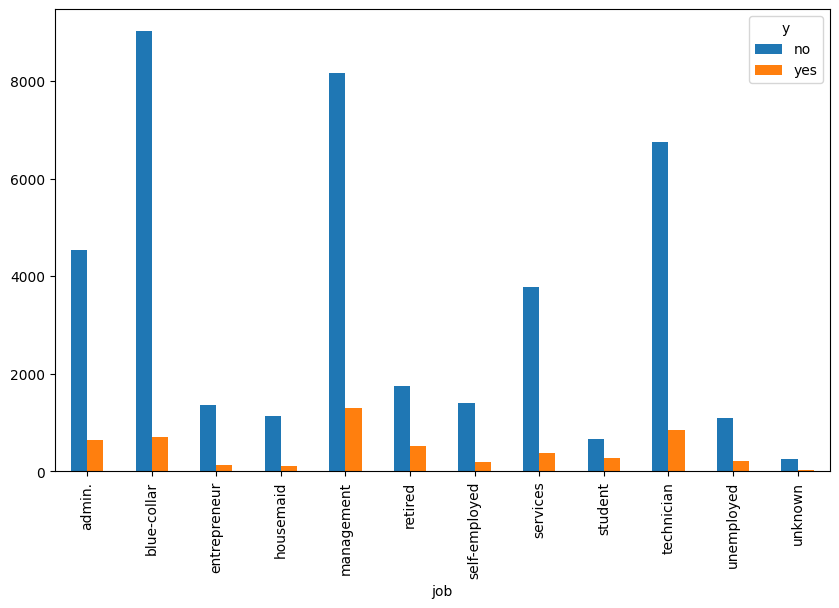

In [ ]:
class_job = pd.crosstab(df['job'], df['y'])
class_job.plot(kind = 'bar',figsize=(10, 6))

<Axes: xlabel='marital'>

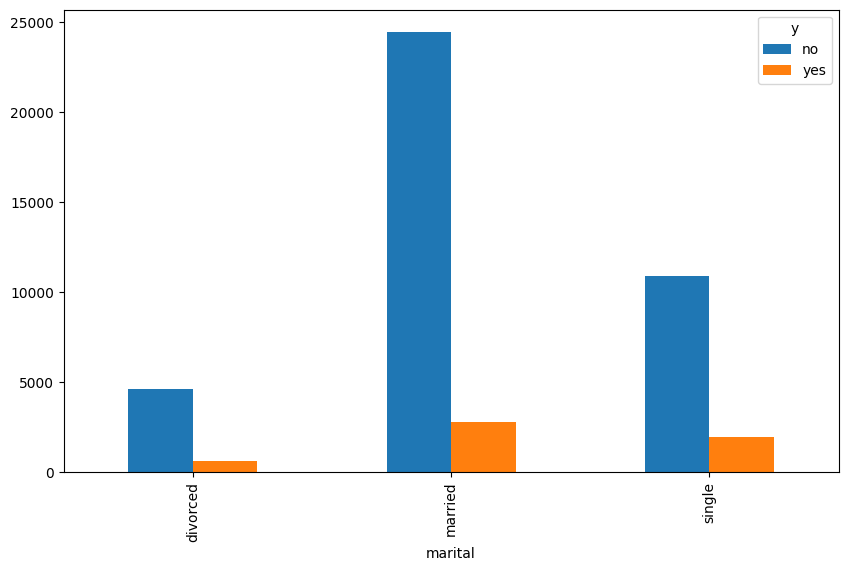

In [ ]:
class_marital = pd.crosstab(df['marital'], df['y'])
class_marital.plot(kind = 'bar',figsize=(10, 6))

<Axes: xlabel='education'>

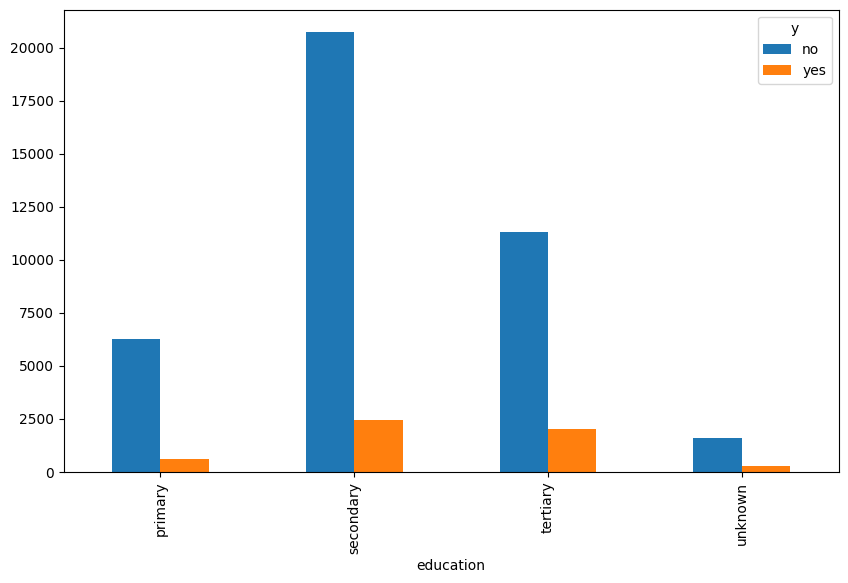

In [ ]:
class_education = pd.crosstab(df['education'], df['y'])
class_education.plot(kind = 'bar',figsize=(10, 6))

<Axes: xlabel='default'>

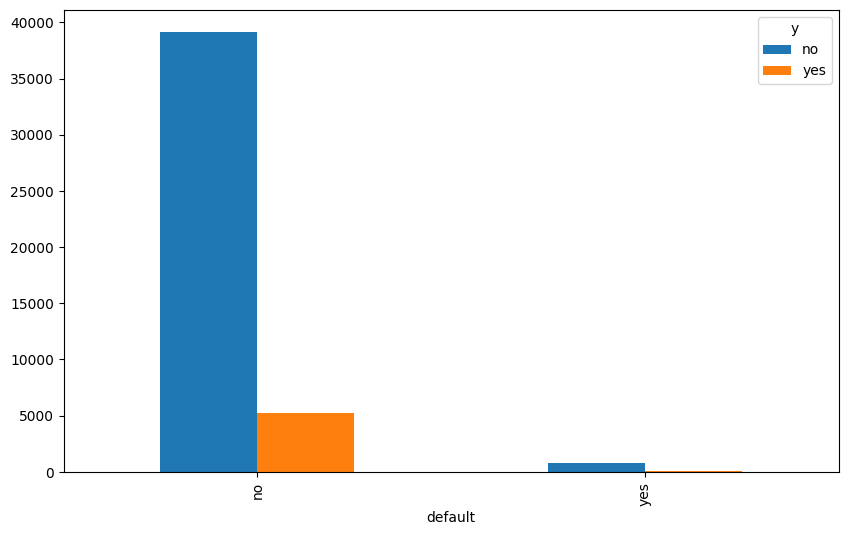

In [ ]:
class_default = pd.crosstab(df['default'], df['y'])
class_default.plot(kind = 'bar',figsize=(10, 6))

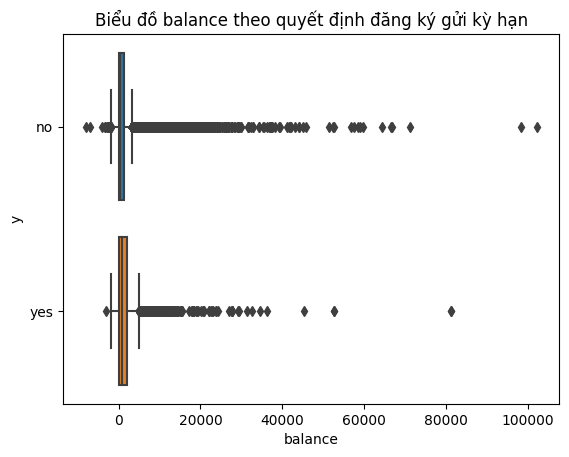

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='balance', y='y', data=df)
plt.title("Biểu đồ balance theo quyết định đăng ký gửi kỳ hạn")
plt.show()

<Axes: xlabel='housing'>

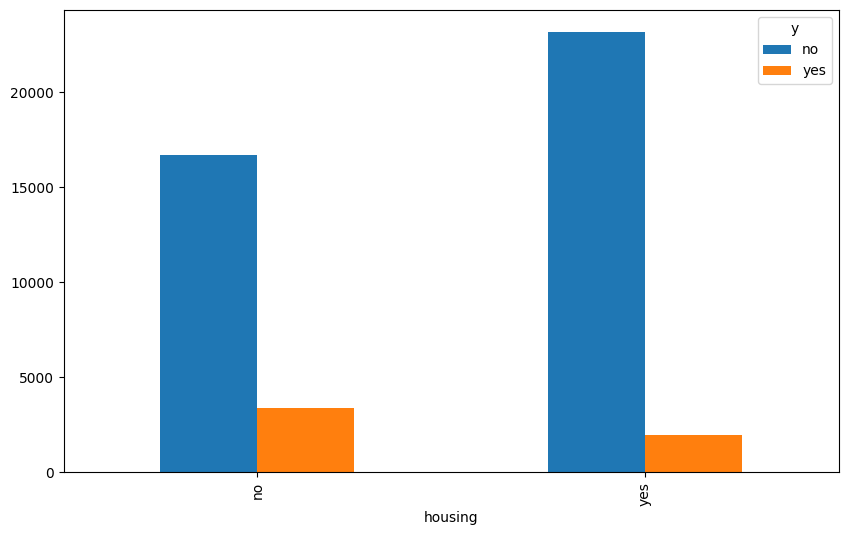

In [ ]:
class_housing = pd.crosstab(df['housing'], df['y'])
class_housing.plot(kind = 'bar',figsize=(10, 6))

<Axes: xlabel='loan'>

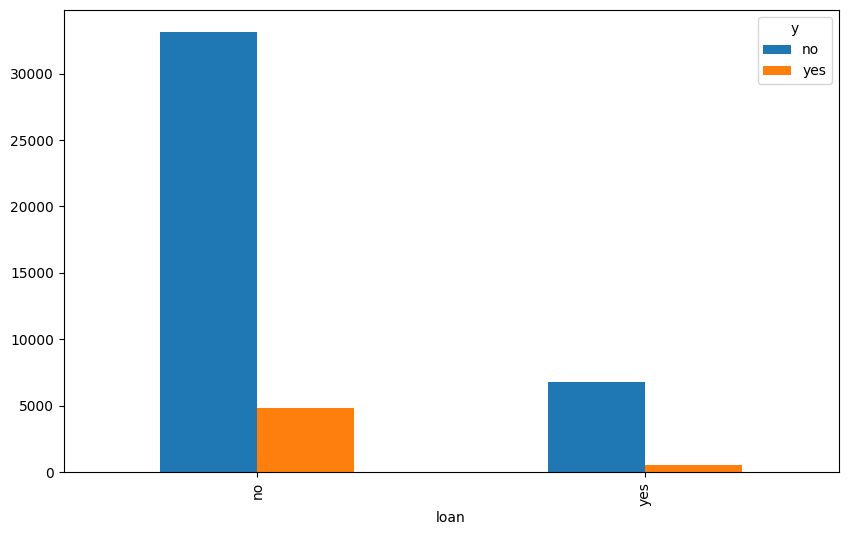

In [ ]:
class_loan = pd.crosstab(df['loan'], df['y'])
class_loan.plot(kind = 'bar',figsize=(10, 6))

<Axes: xlabel='contact'>

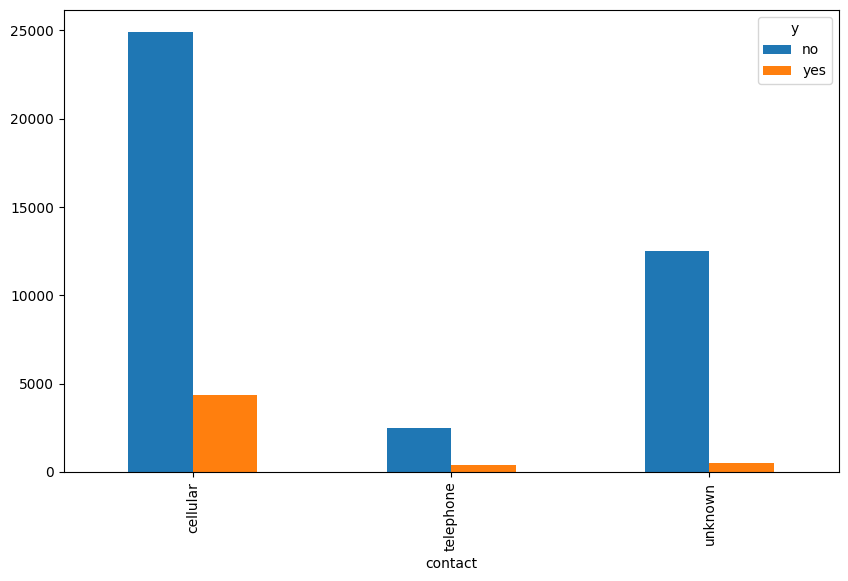

In [ ]:
class_contact = pd.crosstab(df['contact'], df['y'])
class_contact.plot(kind = 'bar',figsize=(10, 6))

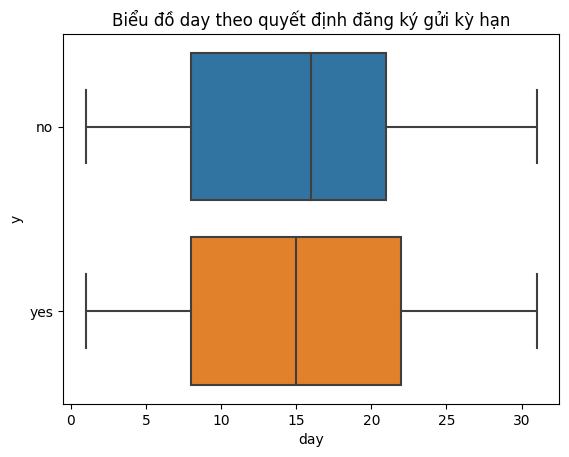

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='day', y='y', data=df)
plt.title("Biểu đồ day theo quyết định đăng ký gửi kỳ hạn")
plt.show()

<Axes: xlabel='month'>

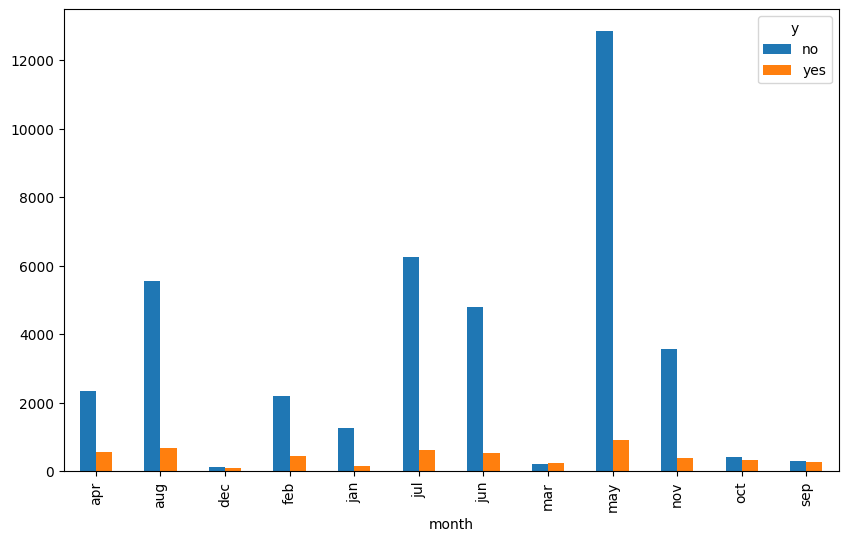

In [ ]:
class_month = pd.crosstab(df['month'], df['y'])
class_month.plot(kind = 'bar',figsize=(10, 6))

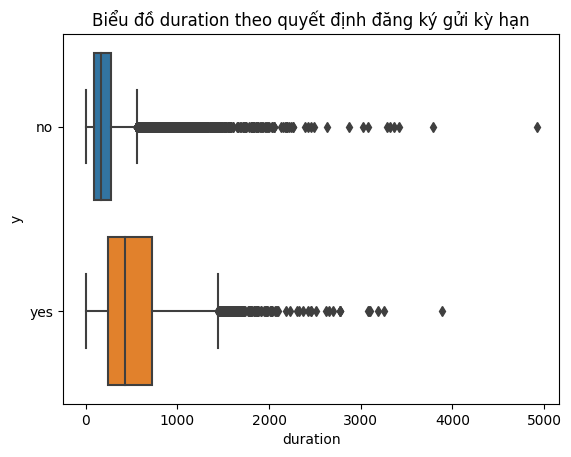

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='duration', y='y', data=df)
plt.title("Biểu đồ duration theo quyết định đăng ký gửi kỳ hạn")
plt.show()

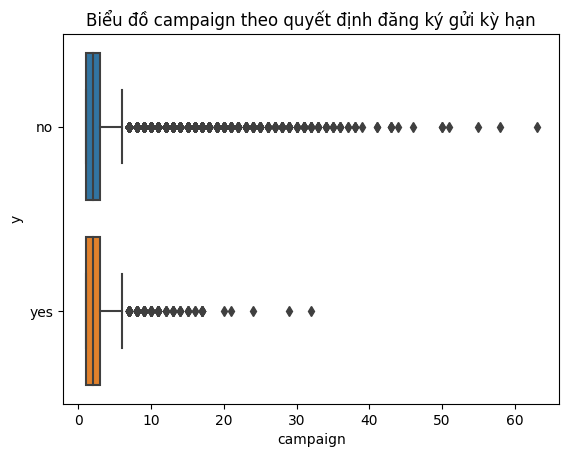

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='campaign', y='y', data=df)
plt.title("Biểu đồ campaign theo quyết định đăng ký gửi kỳ hạn")
plt.show()

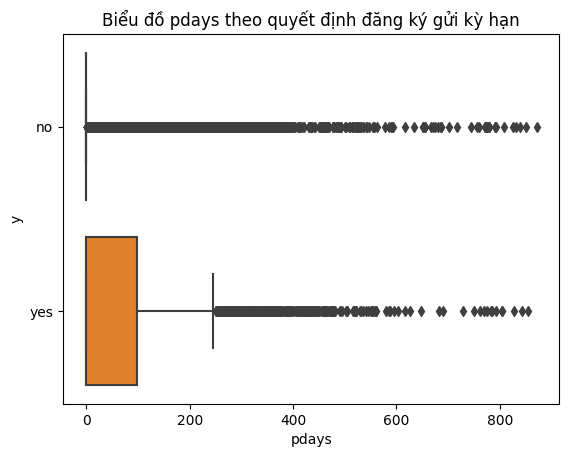

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='pdays', y='y', data=df)
plt.title("Biểu đồ pdays theo quyết định đăng ký gửi kỳ hạn")
plt.show()

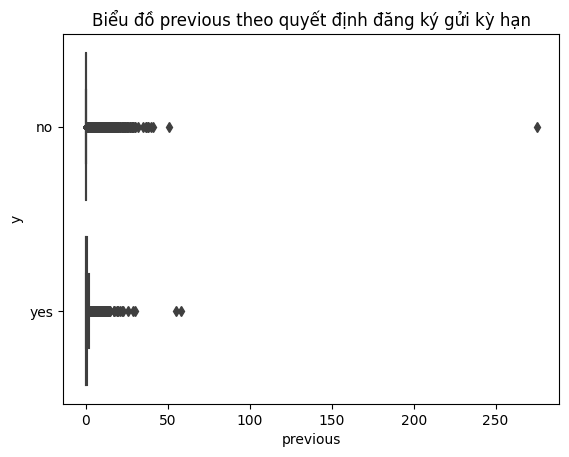

In [ ]:
#  trực quan hóa dữ liệu
sns.boxplot(x='previous', y='y', data=df)
plt.title("Biểu đồ previous theo quyết định đăng ký gửi kỳ hạn")
plt.show()

<Axes: xlabel='poutcome'>

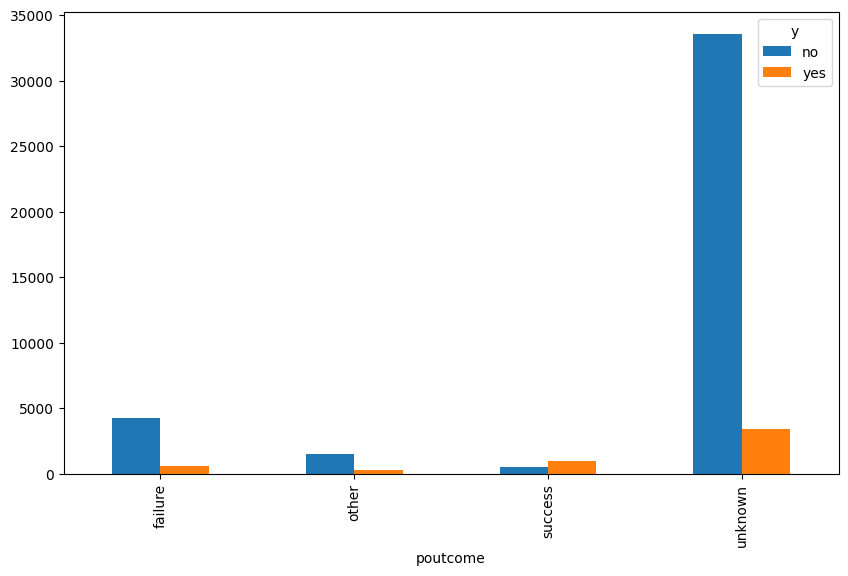

In [ ]:
class_poutcome = pd.crosstab(df['poutcome'], df['y'])
class_poutcome.plot(kind = 'bar',figsize=(10, 6))

In [ ]:
import pandas as pd

# Các thuộc tính cần mã hóa one-hot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Mã hóa one-hot cho các thuộc tính phân loại
# Nó được sử dụng để biến đổi các biến số phân loại (categorical variables) thành một biểu diễn dạng số mà các thuật toán máy học có thể hiểu được.
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Hiển thị DataFrame sau khi mã hóa
print(df_encoded)


       age  balance  day  duration  campaign  pdays  previous    y  \
0       58     2143    5       261         1     -1         0   no   
1       44       29    5       151         1     -1         0   no   
2       33        2    5        76         1     -1         0   no   
3       47     1506    5        92         1     -1         0   no   
4       33        1    5       198         1     -1         0   no   
...    ...      ...  ...       ...       ...    ...       ...  ...   
45206   51      825   17       977         3     -1         0  yes   
45207   71     1729   17       456         2     -1         0  yes   
45208   72     5715   17      1127         5    184         3  yes   
45209   57      668   17       508         4     -1         0   no   
45210   37     2971   17       361         2    188        11   no   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0               0                0  ...          0          0          1   
1      

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Các thuộc tính cần mã hóa số
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Áp dụng LabelEncoder cho từng thuộc tính phân loại
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Hiển thị dfFrame sau khi mã hóa
print(df)



       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration

In [ ]:
df.head(500)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,0,2,1,0,0,1,0,2,6,8,174,2,-1,0,3,0
496,39,1,0,1,0,42,1,0,2,6,8,226,2,-1,0,3,0
497,50,1,0,1,0,41,1,0,2,6,8,190,1,-1,0,3,0
498,44,1,1,1,0,-99,1,0,2,6,8,111,2,-1,0,3,0


In [ ]:
correlation_matrix = df.corr()

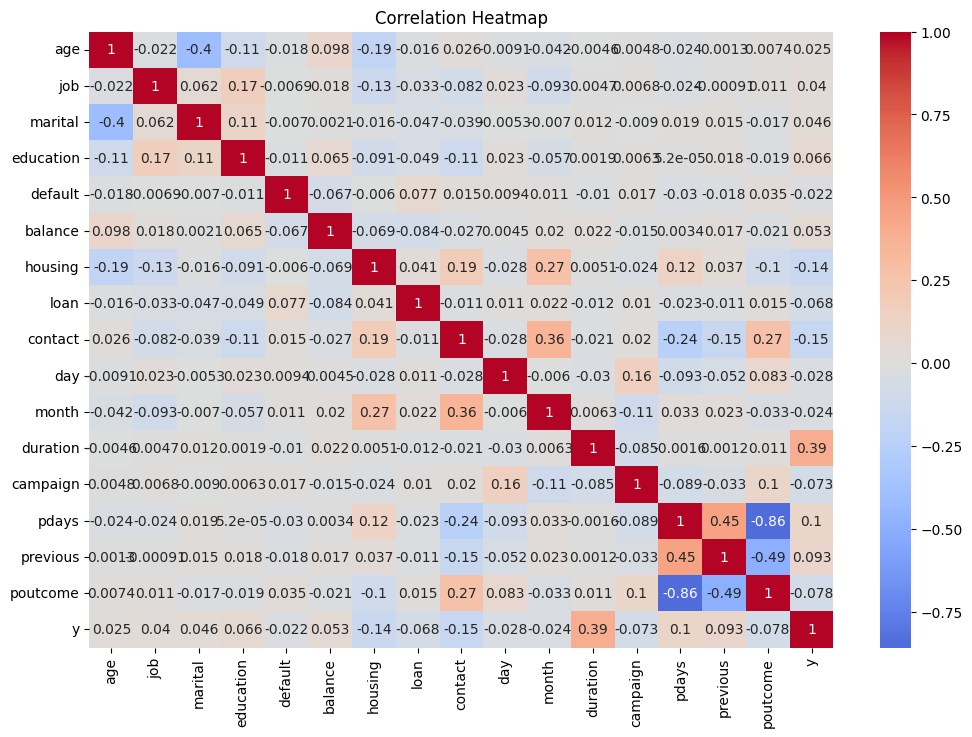

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# xoá các thuộc tính
df = df.drop(["default","housing","loan","contact","day","month","campaign","previous"], axis=1)


In [ ]:
# Chuẩn hóa dữ liệu (maybe)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age','job','marital','education', 'balance', 'duration', 'pdays', 'poutcome' ]] = scaler.fit_transform(df[['age','job','marital','education', 'balance', 'duration', 'pdays', 'poutcome']])

In [ ]:
X = df.drop(['y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head(10)

,age,job,marital,education,balance,duration,pdays,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.011016,-0.411453,0.444898,0
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,-0.416127,-0.411453,0.444898,0
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,-0.707361,-0.411453,0.444898,0
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,-0.645231,-0.411453,0.444898,0
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-0.233620,-0.411453,0.444898,0
5,-0.559037,-0.103820,-0.275762,1.036362,-0.371551,-0.462724,-0.411453,0.444898,0
6,-1.218254,-0.103820,1.368372,1.036362,-0.300608,-0.159841,-0.411453,0.444898,0
7,0.100181,-0.714951,-1.919895,1.036362,-0.446762,0.473107,-0.411453,0.444898,0
8,1.606965,0.201746,-0.275762,-1.637474,-0.407679,-0.808322,-0.411453,0.444898,0
9,0.194355,1.424008,1.368372,-0.300556,-0.252657,-0.788906,-0.411453,0.444898,0


thuật toán **DecisionTree**

In [ ]:
best_max_depth = None
best_accuracy = 0.0

max_depth_list = range(1, 30)
for max_depth in max_depth_list:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=40)
    dt_model.fit(X_train, y_train)

    dt_predictions = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    print(f'max_depth: {max_depth}, Accuracy: {dt_accuracy}')

    if dt_accuracy > best_accuracy:
        best_accuracy = dt_accuracy
        best_max_depth = max_depth

print(f'Best max_depth for Highest Accuracy: {best_max_depth}')

max_depth: 1, Accuracy: 0.8793541966161672
max_depth: 2, Accuracy: 0.885104500718788
max_depth: 3, Accuracy: 0.8932876257879022
max_depth: 4, Accuracy: 0.8956098639831914
max_depth: 5, Accuracy: 0.8960521950680084
max_depth: 6, Accuracy: 0.8976003538648678
max_depth: 7, Accuracy: 0.8980426849496849
max_depth: 8, Accuracy: 0.8956098639831914
max_depth: 9, Accuracy: 0.8949463673559659
max_depth: 10, Accuracy: 0.8945040362711489
max_depth: 11, Accuracy: 0.8915183014486343
max_depth: 12, Accuracy: 0.8908548048214088
max_depth: 13, Accuracy: 0.8898595598805706
max_depth: 14, Accuracy: 0.8884219838549154
max_depth: 15, Accuracy: 0.8810129381842309
max_depth: 16, Accuracy: 0.8791330310737587
max_depth: 17, Accuracy: 0.8767002101072653
max_depth: 18, Accuracy: 0.8703969921486232
max_depth: 19, Accuracy: 0.8679641711821299
max_depth: 20, Accuracy: 0.8659736813004534
max_depth: 21, Accuracy: 0.8618821187658963
max_depth: 22, Accuracy: 0.862656198164326
max_depth: 23, Accuracy: 0.8593387150281986

In [ ]:
print(f'Best Accuracy: {best_accuracy}')

Best Accuracy: 0.8980426849496849


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth= 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

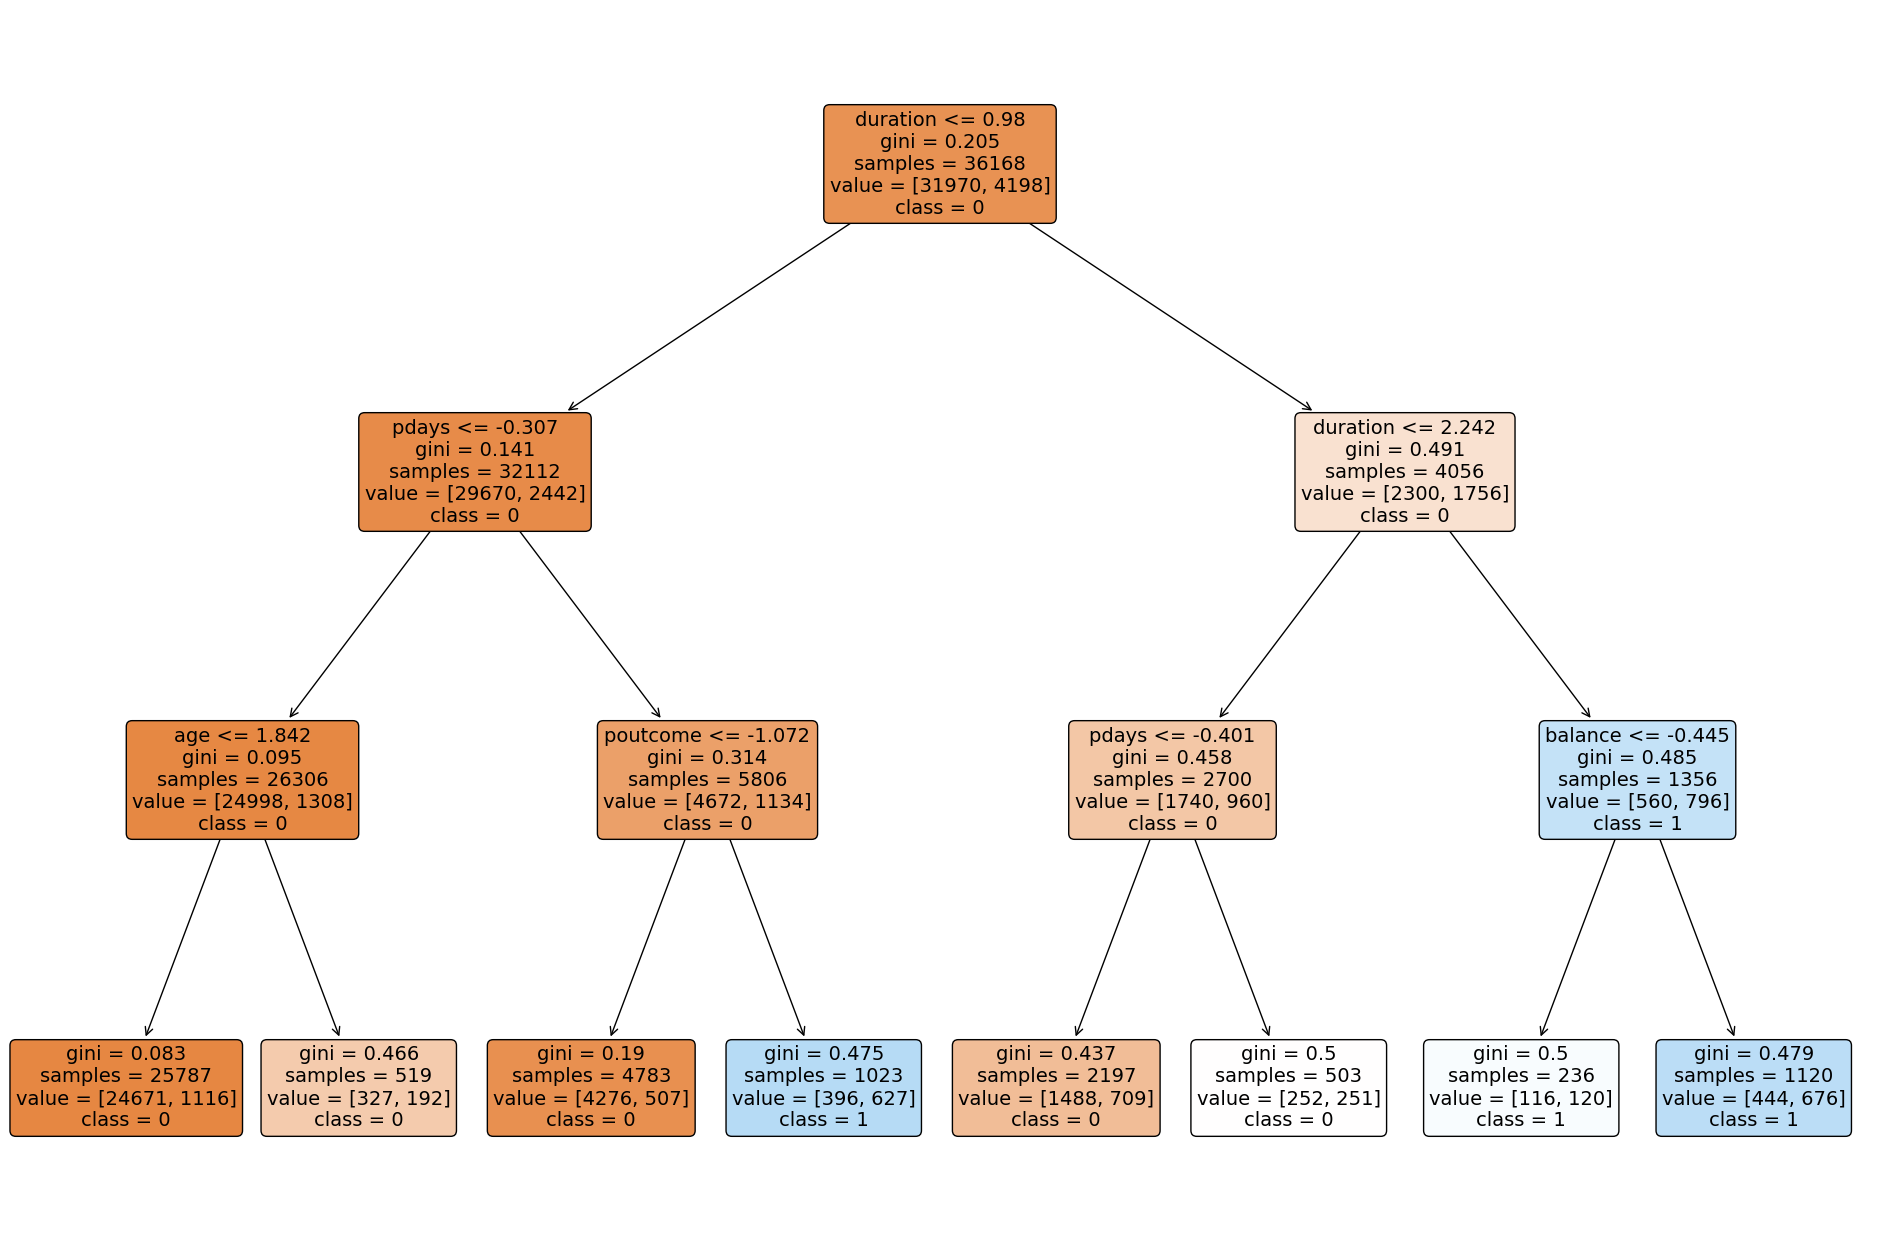

In [ ]:
# mô hình cây quyết định

plt.figure(figsize=(24, 16))
tree.plot_tree(model, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True)
plt.show()

Thông số dự đoán mô hình

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# Tính các thông số đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# In các thông số đánh giá
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8539201592391905
Precision: 0.40086206896551724
Recall: 0.42621448212648944
F1-Score: 0.41314971123944916
Confusion Matrix:
[[7257  695]
 [ 626  465]]


Random Forest

In [ ]:
best_n_estimators = None
best_accuracy = 0.0

n_estimators_list = [20,40,60,80,100,120,140,160,180,200,220,240,260,280,300]

for n_estimators in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    print(f'n_estimators: {n_estimators}, Accuracy: {rf_accuracy}')

    if rf_accuracy > best_accuracy:
        best_accuracy = rf_accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators for Highest Accuracy: {best_n_estimators}')

n_estimators: 20, Accuracy: 0.8907442220502045
n_estimators: 40, Accuracy: 0.893177043016698
n_estimators: 60, Accuracy: 0.8938405396439235
n_estimators: 80, Accuracy: 0.8936193741015149
n_estimators: 100, Accuracy: 0.8942828707287405
n_estimators: 120, Accuracy: 0.8929558774742895
n_estimators: 140, Accuracy: 0.8935087913303107
n_estimators: 160, Accuracy: 0.8948357845847617
n_estimators: 180, Accuracy: 0.8949463673559659
n_estimators: 200, Accuracy: 0.8935087913303107
n_estimators: 220, Accuracy: 0.895388698440783
n_estimators: 240, Accuracy: 0.8947252018135574
n_estimators: 260, Accuracy: 0.8951675328983745
n_estimators: 280, Accuracy: 0.8951675328983745
n_estimators: 300, Accuracy: 0.8952781156695787
Best n_estimators for Highest Accuracy: 220


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=220, random_state=42)

# Huấn luyện mô hình trên dữ liệu huấn luyện
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=220, random_state=42)

In [ ]:
# Dự đoán trên tập test
rf_predictions = rf_model.predict(X_test)

# Đánh giá hiệu suất bằng accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.895388698440783


In [ ]:
# Độ chính xác sau khi test 20 lần của Tree

scores = cross_val_score(model, X, y, cv=20)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[0.91287041 0.90181336 0.92083149 0.92171605 0.90181336 0.91685095
 0.87748784 0.89031402 0.89517912 0.89739054 0.89650597 0.88761062
 0.87743363 0.88628319 0.89292035 0.89115044 0.89070796 0.90044248
 0.86769912 0.76415929]
Average accuracy: 0.89


In [ ]:
# Độ chính xác sau khi test 20 lần của Ramdon Forest

scores = cross_val_score(rf_model, X, y, cv=20)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[0.91463954 0.89915966 0.9031402  0.89385228 0.89783282 0.90888987
 0.87925697 0.88235294 0.90358249 0.89562141 0.89429456 0.89336283
 0.89513274 0.88495575 0.90132743 0.90486726 0.90973451 0.92522124
 0.8699115  0.70221239]
Average accuracy: 0.89


Tạo dữ liệu test mô hình

In [ ]:
data_test = pd.read_csv('/content/bank.csv', header=0, na_values='NA', comment='\t', sep=';', skipinitialspace=True)
# hiển thị thông tin cơ bản về dữ liệu trong DataFrame
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data_test.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
data_test = data_test.drop(["default","housing","loan","contact","day","month","campaign","previous"], axis=1)

In [ ]:
label_encoder2 = LabelEncoder()
data_test['age'] = label_encoder2.fit_transform(data_test['age'])
data_test['job'] = label_encoder2.fit_transform(data_test['job'])
data_test['marital'] = label_encoder2.fit_transform(data_test['marital'])
data_test['education'] = label_encoder2.fit_transform(data_test['education'])
data_test['balance'] = label_encoder2.fit_transform(data_test['balance'])
data_test['duration'] = label_encoder2.fit_transform(data_test['duration'])
data_test['pdays'] = label_encoder2.fit_transform(data_test['pdays'])
data_test['poutcome'] = label_encoder2.fit_transform(data_test['poutcome'])
data_test['y'] = label_encoder2.fit_transform(data_test['y'])

In [ ]:
# Chuẩn hóa dữ liệu (maybe)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_test[['age','job','marital','education', 'balance', 'duration', 'pdays', 'poutcome' ]] = scaler.fit_transform(data_test[['age','job','marital','education', 'balance', 'duration', 'pdays', 'poutcome']])

In [ ]:
X2 = data_test.drop(['y'], axis=1)
y2 = data_test['y']

In [ ]:
rf_predictions = rf_model.predict(X2)

# Đánh giá độ chính xác của mô hình trên tập test
rf_accuracy = accuracy_score(y2, rf_predictions)
print(f'Accuracy of Random Forest on Test Set: {rf_accuracy}')

Accuracy of Random Forest on Test Set: 0.9146206591462066


In [ ]:
dt_predictions = model.predict(X2)

# Đánh giá độ chính xác của mô hình trên tập test
dt_accuracy = accuracy_score(y2, dt_predictions)
print(f'Accuracy of Desision Tree on Test Set: {dt_accuracy}')

Accuracy of Desision Tree on Test Set: 0.8964830789648308
